In [19]:
# Install all the neccessary libraries
# pip install adjustText
# pip install highlight-text

In [4]:
# import all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [5]:
# Read in the data store in excel format
df = pd.read_excel('Euros GoldenBoot.xlsx').reset_index(drop=True)
print(df)


   No              Player  Goals    xG  xGOT  Non-penalty xG  xG per 90  \
0   1          Cody Gakpo      3  1.06  1.88            1.06       0.18   
1   2           Dani Olmo      3  1.71  1.40            1.71       0.36   
2   3        Ivan Schranz      3  1.03  3.04            1.03       0.28   
3   4       Jamal Musiala      3  0.86  2.12            0.86       0.25   
4   5          Harry Kane      3  2.87  3.18            2.08       0.43   
5   6  Georges Mikautadze      3  2.26  2.85            0.68       0.59   

   XGOT per 90  Non-penalty xG per 90  
0         0.32                   0.18  
1         0.29                   0.36  
2         0.82                   0.28  
3         0.63                   0.25  
4         0.47                   0.31  
5         0.74                   0.18  


In [6]:
# convert the data in a dataframe for analysis
df = pd.DataFrame(df)
df


,No,Player,Goals,xG,xGOT,Non-penalty xG,xG per 90,XGOT per 90,Non-penalty xG per 90
0,1,Cody Gakpo,3,1.06,1.88,1.06,0.18,0.32,0.18
1,2,Dani Olmo,3,1.71,1.40,1.71,0.36,0.29,0.36
2,3,Ivan Schranz,3,1.03,3.04,1.03,0.28,0.82,0.28
3,4,Jamal Musiala,3,0.86,2.12,0.86,0.25,0.63,0.25
4,5,Harry Kane,3,2.87,3.18,2.08,0.43,0.47,0.31
5,6,Georges Mikautadze,3,2.26,2.85,0.68,0.59,0.74,0.18


In [7]:
# Calculate SGA (Shooting Goals Added)
# It is the difference between xGOT and xg
df['SGA'] = df['XGOT per 90'] - df['Non-penalty xG per 90']


In [8]:
df

,No,Player,Goals,xG,xGOT,Non-penalty xG,xG per 90,XGOT per 90,Non-penalty xG per 90,SGA
0,1,Cody Gakpo,3,1.06,1.88,1.06,0.18,0.32,0.18,0.14
1,2,Dani Olmo,3,1.71,1.40,1.71,0.36,0.29,0.36,-0.07
2,3,Ivan Schranz,3,1.03,3.04,1.03,0.28,0.82,0.28,0.54
3,4,Jamal Musiala,3,0.86,2.12,0.86,0.25,0.63,0.25,0.38
4,5,Harry Kane,3,2.87,3.18,2.08,0.43,0.47,0.31,0.16
5,6,Georges Mikautadze,3,2.26,2.85,0.68,0.59,0.74,0.18,0.56


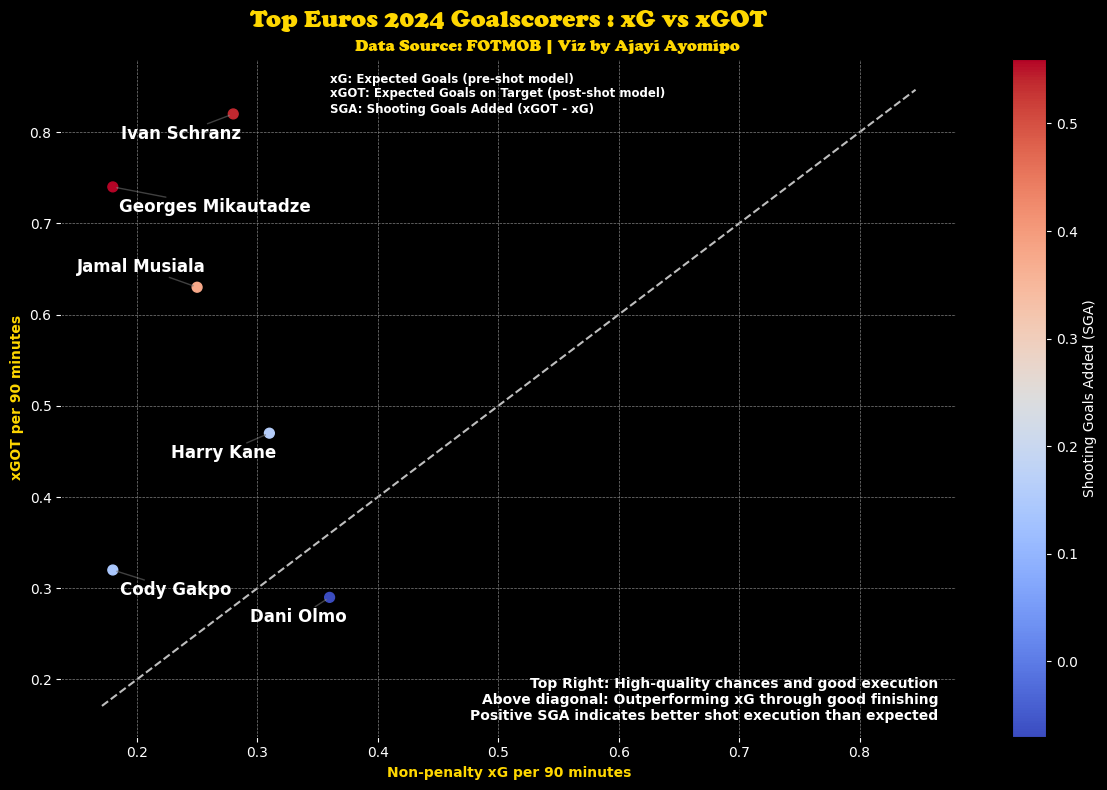

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


# Create scatter plot with color-coded SGA
scatter = ax.scatter(df["Non-penalty xG per 90"], df["XGOT per 90"], 
                     c=df['SGA'], cmap='coolwarm', s=50)

# Add diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'w--', alpha=0.75, zorder=0)

# Adding the data on x and y axis
texts = [ax.text(df["Non-penalty xG per 90"][i], df["XGOT per 90"][i], df["Player"][i], 
                 ha='center', va='center', fontsize=12, color='white', weight='bold') for i in range(df.shape[0])]
adjust_text(texts, expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5))

plt.title('Top Euros 2024 Goalscorers : xG vs xGOT', color='gold', fontfamily='Cooper Black', pad=23, fontsize=18)
fig.text(0.46, 0.93, 'Data Source: FOTMOB | Viz by Ajayi Ayomipo', ha='center', fontfamily='Cooper Black', color='gold', fontsize=12)

plt.xlabel('Non-penalty xG per 90 minutes', color='gold', weight='bold')
plt.ylabel('xGOT per 90 minutes', color='gold', weight='bold')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Add colorbar for SGA
cbar = plt.colorbar(scatter)
cbar.set_label('Shooting Goals Added (SGA)', color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Add legend explaining xG and xGOT
ax.text(0.3, 0.98, 'xG: Expected Goals (pre-shot model)\n'
        'xGOT: Expected Goals on Target (post-shot model)\n'
        'SGA: Shooting Goals Added (xGOT - xG)\n', 
        transform=ax.transAxes, color='white', fontsize=8.5, verticalalignment='top', weight='bold')

# Add explanation for positioning
ax.text(0.98, 0.02, 'Top Right: High-quality chances and good execution\n'
        'Above diagonal: Outperforming xG through good finishing\n'
        'Positive SGA indicates better shot execution than expected', 
        transform=ax.transAxes, color='white', fontsize=10, 
        horizontalalignment='right', verticalalignment='bottom',  weight='bold')
# Display and save you viz
plt.tight_layout()
plt.savefig("TOP10GB.png", dpi=300, bbox_inches='tight')
plt.show()